<a href="https://colab.research.google.com/github/Het0c/ep3Machine/blob/main/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
from google.colab import files

# Cargar datos

if not os.path.exists("csgo_datos_limpios.csv"):
  uploaded = files.upload()

df = pd.read_csv("csgo_datos_limpios.csv", sep=",")

df.head()

<ipython-input-2-ecd1889abb45>:18: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("csgo_datos_limpios.csv", sep=",")


,Map,Team,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,...,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,TotalGrenades,RoundDeaths,KDR
0,de_inferno,Terrorist,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,...,0,750,4400,0,0,0,0,4,1,0.0
1,de_inferno,Terrorist,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,...,0,800,4400,0,0,0,0,0,1,0.0
2,de_inferno,Terrorist,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,...,0,1000,4400,0,0,0,0,0,1,0.0
3,de_inferno,Terrorist,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,...,0,850,4400,0,0,0,0,0,1,0.0
4,de_inferno,Terrorist,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,...,0,1000,4400,0,0,0,0,2,0,0.0


# Filtracion, definicion de variables y target

In [3]:
# Filtrar solo las partidas sin errores:
df_clean = df[df["AbnormalMatch"] == False].copy()

# Definir las variables predictoras y el target
features = [
    "RoundKills",
    "RoundAssists",
    "RoundHeadshots",
    "MatchAssists"
]
target = "MatchKills"  # Número total de kills en la partida

# Extraer X (predictoras) e y (target), rellenando posibles nulos con la media
X = df_clean[features].fillna(df_clean[features].mean())
y = df_clean[target].fillna(df_clean[target].mean())


# division, escalado y prediccion

In [4]:

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de las características (muy importante en SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de SVR (kernel RBF es el predeterminado)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Realizar predicción en el conjunto de prueba
y_pred = svr_model.predict(X_test_scaled)






# Metricas de evaluacion

In [5]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regresión con Support Vector Machine (SVR): Variables predictoras -> MatchKills")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

Regresión con Support Vector Machine (SVR): Variables predictoras -> MatchKills
MSE: 26.76
MAE: 3.96
R²: 0.31


# Visualizacion

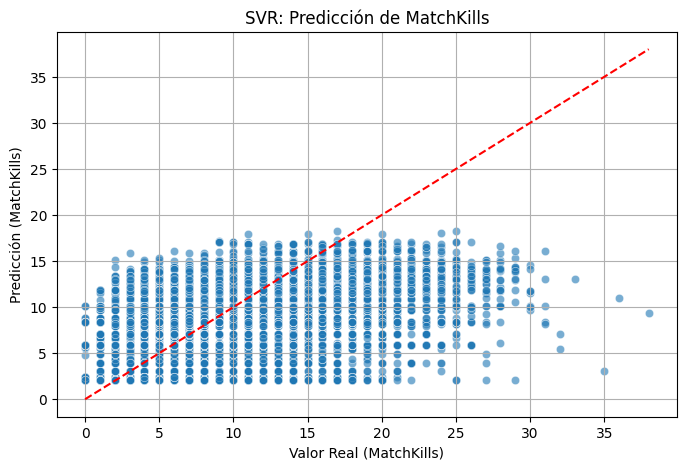

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal 45°
plt.xlabel("Valor Real (MatchKills)")
plt.ylabel("Predicción (MatchKills)")
plt.title("SVR: Predicción de MatchKills")
plt.grid(True)
plt.show()

MSE (26.76): El error cuadrático medio ha disminuido, lo que indica que en promedio los valores predichos se alejan menos de los reales respecto a otros modelos.

MAE (3.96): El modelo se equivoca, en promedio, por aproximadamente 4 kills, lo cual es una mejora y sugiere predicciones más precisas.

R² (0.31): Con un 31% de la variabilidad de MatchKills explicada, el modelo SVR tiene un rendimiento moderado, mucho mejor que la regresión lineal simple en este caso.